Assignment 1, Varun Vashishtha, 2022201061


1. [1.5 points] Imagine that the chessboard in assign1.jpg was moved by 10 cm to the right (along the ruler).
Overlay a wireframe (4 points) of the virtual chessboard on the image at the appropriate location. Does the
wireframe look consistent with what you expect?

Answer : visually it looks almost similar but below i found the area of both wireframes and it shows the difference in the shapes.

In [281]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((5*5,3), np.float32)
objp[:,:2] = np.mgrid[0:5,0:5].T.reshape(-1,2)
worldpoints = []
worldpoints.append(objp)
imgpoints = []
# images = glob.glob('img_with_corners.jpg')
img = cv2.imread("assign1.jpg")
resize_factor = 0.2  # Adjust this factor as needed
height, width = img.shape[0], img.shape[1]
img1 = cv2.resize(img, (int(width * resize_factor), int(height * resize_factor)))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray',gray)
cv2.imwrite('gray.jpg', gray, None)
cv2.waitKey(0)


-1

In [282]:
image_assign = cv2.imread('assign1.jpg')
gray_assign = cv2.cvtColor(image_assign, cv2.COLOR_BGR2GRAY)
pattern=(5,5)  

flags = cv2.CALIB_CB_EXHAUSTIVE + cv2.CALIB_CB_ACCURACY
ret, corners = cv2.findChessboardCorners(gray_assign, pattern, flags=flags)


if ret:
    image_with_corners_assign = cv2.drawChessboardCorners(image_assign, pattern, corners, ret)
    cv2.imwrite('assign_corners.jpg', image_with_corners_assign)

else:
    print("Not found.")

In [283]:
corners

array([[[ 869.1648 ,  823.09216]],

       [[ 966.8472 ,  823.3986 ]],

       [[1064.3094 ,  825.2774 ]],

       [[1161.6227 ,  825.8564 ]],

       [[1259.0435 ,  827.14886]],

       [[ 862.4519 ,  856.40405]],

       [[ 964.0967 ,  856.5464 ]],

       [[1064.4556 ,  857.5128 ]],

       [[1164.6781 ,  858.9533 ]],

       [[1265.5962 ,  859.5603 ]],

       [[ 858.6876 ,  891.21045]],

       [[ 961.57446,  891.577  ]],

       [[1065.5906 ,  893.5131 ]],

       [[1167.9188 ,  893.8629 ]],

       [[1271.5347 ,  895.8489 ]],

       [[ 851.7009 ,  929.1582 ]],

       [[ 959.2433 ,  928.81525]],

       [[1066.2081 ,  929.342  ]],

       [[1171.7886 ,  931.4027 ]],

       [[1277.0616 ,  931.96326]],

       [[ 847.7739 ,  967.18225]],

       [[ 957.32434,  967.0526 ]],

       [[1065.4227 ,  969.0103 ]],

       [[1175.454  ,  969.3    ]],

       [[1281.9503 ,  970.62494]]], dtype=float32)

In [284]:
worldpoints = []
imagepoints = []

for corner in corners:
    imagepoints.append(corner)
imagepoints = [imagepoints]


for y in range(2, 11, 2):
    for x in range(2, 11, 2):
        worldpoints.append([x, y, 0])

worldpoints = [worldpoints]


In [285]:
worldpoints

[[[2, 2, 0],
  [4, 2, 0],
  [6, 2, 0],
  [8, 2, 0],
  [10, 2, 0],
  [2, 4, 0],
  [4, 4, 0],
  [6, 4, 0],
  [8, 4, 0],
  [10, 4, 0],
  [2, 6, 0],
  [4, 6, 0],
  [6, 6, 0],
  [8, 6, 0],
  [10, 6, 0],
  [2, 8, 0],
  [4, 8, 0],
  [6, 8, 0],
  [8, 8, 0],
  [10, 8, 0],
  [2, 10, 0],
  [4, 10, 0],
  [6, 10, 0],
  [8, 10, 0],
  [10, 10, 0]]]

In [286]:


worldpoints = np.array(worldpoints, dtype = np.float32)
imagepoints = np.array(imagepoints, dtype = np.float32)

worldpoints.shape, imagepoints.shape

((1, 25, 3), (1, 25, 1, 2))

In [287]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(worldpoints, imagepoints, (img.shape[0], img.shape[1]), None, None, flags=cv2.CALIB_FIX_ASPECT_RATIO)


In [288]:
ret, mtx, dist, rvecs, tvecs 

(0.7319773703739991,
 array([[3.53003191e+03, 0.00000000e+00, 7.13458740e+02],
        [0.00000000e+00, 3.53003191e+03, 1.09449472e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-4.21299126e-01, -7.47569748e+01, -3.23689956e-02,
          8.07556290e-02,  1.59882690e+03]]),
 (array([[-1.15517846],
         [ 0.06867279],
         [ 0.06298483]]),),
 (array([[ 1.32480844],
         [-6.40739905],
         [75.15851452]]),))

In [290]:
R = cv2.Rodrigues(rvecs[0])[0]
t = tvecs[0]
Rt = np.concatenate([R,t], axis = -1)
projection_matrix = np.matmul(mtx, Rt)

print(Rt)

[[ 9.96123170e-01 -8.52217901e-02  2.18145881e-02  1.32480844e+00]
 [ 1.43834010e-02  4.02425255e-01  9.15339845e-01 -6.40739905e+00]
 [-8.67856413e-02 -9.11477460e-01  4.02090900e-01  7.51585145e+01]]


In [291]:
projection_matrix


array([[ 3.45442860e+03, -9.51137199e+02,  3.63881459e+02,
         5.82991151e+04],
       [-4.42125619e+01,  4.22966725e+02,  3.67126523e+03,
         5.96422742e+04],
       [-8.67856413e-02, -9.11477460e-01,  4.02090900e-01,
         7.51585145e+01]])

In [292]:
import matplotlib.pyplot as plt



def plot_image(projection_matrix, world_coordinates, image_name = 'calib-object.jpg'):

    P = projection_matrix
    K = mtx

    wireframe_points_3d = world_coordinates
    wireframe_points_homogeneous = np.hstack((wireframe_points_3d, np.ones((wireframe_points_3d.shape[0], 1))))

    print("Shape :",  wireframe_points_homogeneous.shape, K.shape, P.shape)
    wireframe_points_2d = np.dot(P, wireframe_points_homogeneous.T)
    temp = wireframe_points_2d
    # for val in wireframe_points_2d:
    #     val[1] = -1*val[1]
    wireframe_points_2d = wireframe_points_2d.T
    print(wireframe_points_2d)
    new_mat = []
    for val in wireframe_points_2d:
        new_mat.append([int(val[0]/val[2]), int(val[1]/val[2])])
    new_mat = np.array(new_mat)
    img = cv2.imread(image_name)
    size = len(world_coordinates)
    print("new_mat :", new_mat)
    # Overlay the wireframe on the actual image
    for i in range(size):
        cv2.circle(img, tuple(new_mat[i].astype(int)), 5, (0, 255, 0), -1)

    for i in range(size):
        cv2.line(img, tuple(new_mat[i].astype(int)), tuple(new_mat[(i+1)%size].astype(int)), (0, 255, 255), 10)

    # Display the image with overlay
    resize_factor = 0.2  # Adjust this factor as needed
    height, width = img.shape[0], img.shape[1]
    resized_img = cv2.resize(img, (int(width * resize_factor), int(height * resize_factor)))
    cv2.imshow('Image', resized_img)
    cv2.imwrite('ques3_part1_wireframe1.jpg', img, None)
    plt.imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()




Shape : (4, 4) (3, 3) (3, 4)
[[5.82991151e+04 5.96422742e+04 7.51585145e+01]
 [9.97522584e+04 5.91117235e+04 7.41170868e+01]
 [8.83386120e+04 6.41873242e+04 6.31793573e+01]
 [4.68854688e+04 6.47178749e+04 6.42207850e+01]]
new_mat : [[ 775  793]
 [1345  797]
 [1398 1015]
 [ 730 1007]]


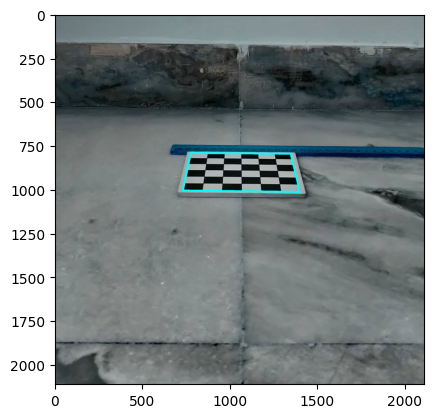

In [293]:
# world_coordinates = np.array([[0, 0, 0], [0, 12, 0], [12, 12, 0], [12, 0, 0]], dtype=np.float32)
world_coordinates = np.array([[0, 0, 0], [12, 0, 0], [12, 12, 0], [0, 12, 0]], dtype=np.float32)
plot_image(projection_matrix, world_coordinates, 'assign1.jpg')



In [294]:
wireframe = []

for x in range(2, 11, 2):
    for y in range(2, 11, 2):
        wireframe.append([y, x+14, 0])

wireframe = [wireframe]
wireframe = np.array(wireframe, dtype = np.float32)


SHIFTED WIREFRAME(Here i changed the shifted world coordinates to image coordinates and then plotted it)

Shape : (4, 4) (3, 3) (3, 4)
[[9.28434012e+04 5.92001486e+04 7.42906581e+01]
 [1.34296544e+05 5.86695979e+04 7.32492304e+01]
 [1.22882898e+05 6.37451986e+04 6.23115009e+01]
 [8.14297548e+04 6.42757493e+04 6.33529286e+01]]
new_mat : [[1249  796]
 [1833  800]
 [1972 1023]
 [1285 1014]]


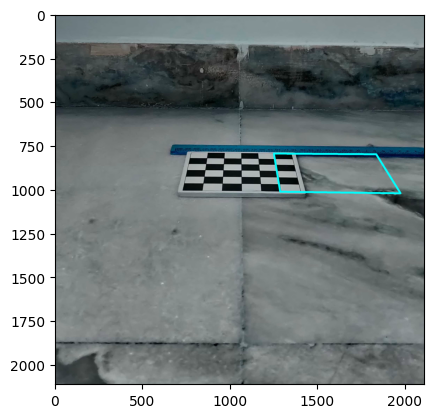

In [295]:
shift = 10
world_coordinates = np.array([[0+shift, 0, 0], [12+shift, 0, 0], [12+shift, 12, 0], [0+shift, 12, 0]], dtype=np.float32)
plot_image(projection_matrix, world_coordinates, 'assign1.jpg')

Shape : (4, 4) (3, 3) (3, 4)
[[1.06661116e+05 5.90232984e+04 7.39435155e+01]
 [1.48114259e+05 5.84927476e+04 7.29020878e+01]
 [1.36700612e+05 6.35683483e+04 6.19643583e+01]
 [9.52474692e+04 6.40988991e+04 6.30057860e+01]]
new_mat : [[1442  798]
 [2031  802]
 [2206 1025]
 [1511 1017]]


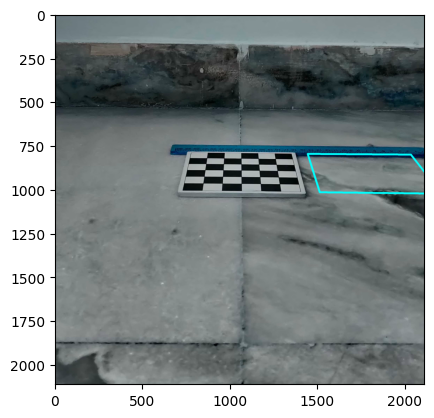

In [377]:
shift = 14
world_coordinates = np.array([[0+shift, 0, 0], [12+shift, 0, 0], [12+shift, 12, 0], [0+shift, 12, 0]], dtype=np.float32)
plot_image(projection_matrix, world_coordinates, 'assign1.jpg')

CHANGE IN WIREFRAME SHAPE

In [ ]:
get_image_coordinateds(np.array([[0, 0, 0], [12, 0, 0], [12, 12, 0], [0, 12, 0]], dtype=np.float32), projection_matrix)


array([[ 775.68211018,  793.55312701],
       [1345.87397667,  797.54515469],
       [1398.2195415 , 1015.95405396],
       [ 730.06688969, 1007.74032772]])

In [ ]:
get_image_coordinateds(np.array([[12, 0, 0], [24, 0, 0], [24, 12, 0], [12, 12, 0]], dtype=np.float32), projection_matrix)

array([[1345.87397667,  797.54515469],
       [1932.31786494,  801.65096604],
       [2088.76858408, 1024.44310325],
       [1398.2195415 , 1015.95405396]])

In [ ]:
def area_of_quadrilateral(vertices):
    # Extract coordinates of vertices
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]
    x4, y4 = vertices[3]

    # Calculate the area of the quadrilateral by summing the areas of two triangles
    area_triangle1 = abs((x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2)
    area_triangle2 = abs((x1*(y3-y4) + x3*(y4-y1) + x4*(y1-y3)) / 2)

    total_area = area_triangle1 + area_triangle2

    return total_area

#innitial woreframe shape
vertices = [[ 775.68211018,  793.55312701],
       [1345.87397667,  797.54515469],
       [1398.2195415 , 1015.95405396],
       [ 730.06688969, 1007.74032772]] 
quadrilateral_area = area_of_quadrilateral(vertices)
print("Area of quadrilateral:", quadrilateral_area)

# shifted wireframe shape
vertices = np.array([[1345.87397667,  797.54515469],
       [1932.31786494,  801.65096604],
       [2088.76858408, 1024.44310325],
       [1398.2195415 , 1015.95405396]] , dtype=np.float32)
quadrilateral_area = area_of_quadrilateral(vertices)
print("Area of quadrilateral:", quadrilateral_area)


Area of quadrilateral: 133905.21503034522
Area of quadrilateral: 140195.2265625


2. [1.5 points] Now, think of how you would move the actual pixels or pattern of the chessboard? Overlay the
chessboard pattern within the predicted wireframe. Is the overlay consistent with what you expect?


answer : Visually its looking almost similar as the all the points are projected in the same area of the wireframe only so  

Solution : I took various world coordinates and then stored there corresponding pixel values and after that i shifted my world coordinates by value(shift) and get the corresponding mage coordinates and the n assigned the colour to them means it align with the wireframe in a visually meaningful way, reflecting the predicted positions of the corners. overlay of the chessboard pattern is consistent with the wireframe overlay as expected.

In [ ]:
def get_image_coordinateds(wireframe_points_3d, projection_matrix):
    P = projection_matrix
    K = mtx
    wireframe_points_homogeneous = np.hstack((wireframe_points_3d, np.ones((wireframe_points_3d.shape[0], 1))))
    wireframe_points_2d = np.dot(P, wireframe_points_homogeneous.T)
    temp = wireframe_points_2d
    wireframe_points_2d = wireframe_points_2d.T
    # print(wireframe_points_2d)
    new_mat = []
    for val in wireframe_points_2d:
        new_mat.append([val[0]/val[2], val[1]/val[2]])
    new_mat = np.array(new_mat)
    return new_mat


In [ ]:
world_coors.shape, new_world_coors.shape

((14400, 3), (14400, 3))

In [ ]:
image_coors

array([[ 775.68211018,  793.55312701],
       [ 775.35690836,  795.08011879],
       [ 775.03091586,  796.61082325],
       ...,
       [1391.05661489, 1009.50775684],
       [1391.5565011 , 1011.62721916],
       [1392.0578274 , 1013.75278724]])

In [ ]:
world_coors = []
colors = []
for i in np.arange(0, 12, 0.1):
    for j in np.arange(0, 12, 0.1):
        world_coors.append([i, j, 0])
        # colors.append(img[x][y])



world_coors = np.array(world_coors)
image_coors = get_image_coordinateds(world_coors, projection_matrix)

img = cv2.imread("assign1.jpg")
for val in image_coords:
    colors.append(img[val[0]][val[1]])

colors = np.array(colors)


In [ ]:
world_coors = []
colors = []
img = cv2.imread("assign1.jpg")
shift = 10

for i in np.arange(12, 0, -0.02):
    for j in np.arange(12, 0, -0.02):
        x, y = get_image_coordinateds(np.array([[i, j, 0]]), projection_matrix)[0]
        # print(x, y)
        x, y = int(x), int(y)
        color = img[y][x]

        x1, y1 = get_image_coordinateds(np.array([[i+shift, j, 0]]), projection_matrix)[0]

        x1, y1 = int(x1), int(y1)
        try:
            img[y1][x1] = color
        except:
            pass


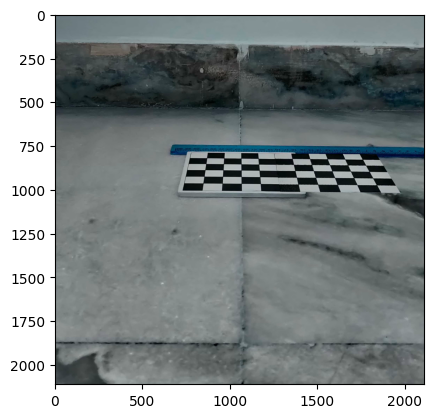

In [ ]:
cv2.imwrite('shifted_image_final_10.jpg', img)
plt.imshow(img)

Challenges and problems : 
1) understanding the problem and how to get world and image coordinates
2) Understanding how to use various opencv functions eg findChessboardCorners, alliberateCamera etc
3) plotting the wireframe on the image means how to plot a new thing on the same image 
4) selecting what algorithm to use
5) Troubleshooting and Debugging ate a lot of time
6) handling sigle plane points 

Learnings : 
From the above assignments involving camera calibration, projection matrices, wireframe overlay, and chessboard pattern projection, several key learning points can be derived:

Camera Calibration: Understanding the process of camera calibration is crucial for obtaining accurate intrinsic and extrinsic camera parameters. This involves capturing calibration images with known calibration patterns, detecting feature points, and estimating the camera parameters using calibration algorithms.

Projection Matrices: Learning about projection matrices and their role in transforming 3D world coordinates into 2D image coordinates is essential. This includes understanding how intrinsic and extrinsic parameters are combined to form the projection matrix and how it is used to project points onto the image plane.

Wireframe Overlay: Overlaying wireframe models onto images provides a visual representation of 3D objects in the image. This involves transforming 3D object coordinates into 2D image coordinates using projection matrices and rendering wireframe models onto images using appropriate rendering techniques.

Chessboard Pattern Projection: Projecting chessboard patterns onto images serves as a calibration step to validate the accuracy of camera calibration. This involves projecting known patterns onto images using projection matrices and comparing the projected patterns with detected feature points.

Ambiguity and Challenges: Dealing with ambiguity and challenges in camera calibration, such as coplanar points, lens distortion, and noise, requires careful consideration and appropriate handling techniques. This includes understanding the limitations and potential sources of error in the calibration process.

Visualization and Interpretation: Visualizing and interpreting the results of camera calibration, wireframe overlay, and pattern projection are essential for understanding the geometric relationships between 3D objects and 2D images. This involves analyzing visualizations and drawing conclusions about the accuracy and reliability of the calibration process.

Practical Skills: Developing practical skills in computer vision, image processing, and geometric transformations is essential for implementing calibration algorithms, projection techniques, and rendering methods effectively.

Overall, the assignments provide valuable insights into the theoretical concepts and practical aspects of camera calibration and geometric transformations, enhancing understanding and proficiency in computer vision and image processing tasks.

ENDS HERE

PRACTICE

GET THAT PARTICULAR REGION POINTS


In [296]:
world_coordinates = np.array([[0, 0, 0], [12, 0, 0], [12, 12, 0], [0, 12, 0]], dtype=np.float32)


In [297]:
wireframe_points_3d = world_coordinates

# Compute the 2D image coordinates of the wireframe points
wireframe_points_homogeneous = np.hstack((wireframe_points_3d, np.ones((wireframe_points_3d.shape[0], 1))))

print("Shape :",  wireframe_points_homogeneous.shape, mtx.shape, projection_matrix.shape)
wireframe_points_2d = np.dot(projection_matrix, wireframe_points_homogeneous.T)
temp = wireframe_points_2d
# for val in wireframe_points_2d:
#     val[1] = -1*val[1]
wireframe_points_2d = wireframe_points_2d.T
print(wireframe_points_2d)
new_mat = []
for val in wireframe_points_2d:
    new_mat.append([int(val[0]/val[2]), int(val[1]/val[2])])


new_mat

Shape : (4, 4) (3, 3) (3, 4)
[[5.82991151e+04 5.96422742e+04 7.51585145e+01]
 [9.97522584e+04 5.91117235e+04 7.41170868e+01]
 [8.83386120e+04 6.41873242e+04 6.31793573e+01]
 [4.68854688e+04 6.47178749e+04 6.42207850e+01]]


[[775, 793], [1345, 797], [1398, 1015], [730, 1007]]

In [299]:
import numpy as np
import cv2

# Assuming 'img' and 'world_coordinates' are defined earlier in your code

# Convert world_coordinates to a numpy array with int32 data type
polygon_vertices = np.array(world_coordinates, dtype=np.int32)

# Ensure new_mat is properly formatted and has the correct data type
new_mat = [(x, y) for x, y in new_mat]  # Ensure new_mat is a list of tuples
new_mat = np.array(new_mat, dtype=np.int32)

# Create an empty mask with the same dimensions as the image
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Fill the convex polygon region with white color (255)
cv2.fillConvexPoly(mask, new_mat, 255)
# print(np.unique(mask))

# Threshold the mask to obtain binary image
# mask = mask > 0
# Display the mask
# cv2.imshow('Mask', mask)  # Convert boolean mask to uint8 for visualization
cv2.imwrite('mask.jpg', mask)

cv2.waitKey(0)
cv2.destroyAllWindows()


GET PROJECTION OF ALL POINTS

In [300]:
unique_elements, counts = np.unique(mask, return_counts=True)

# Zip the unique elements and their frequencies together for easy iteration
frequency_dict = dict(zip(unique_elements, counts))

# Print the frequency of each element
for element, frequency in frequency_dict.items():
    print(f"Element {element} appears {frequency} times.")

Element 0 appears 4326028 times.
Element 255 appears 134516 times.


In [301]:
masked_image = []

for i in range(img.shape[0]):
    temp = []
    for j in range(img.shape[1]):
        if mask[i][j] == 255:
            temp.append([i, j])
    if len(temp) > 0:
        masked_image.append(np.array(temp))



In [302]:
import numpy as np

# Initialize an empty list to store concatenated arrays of coordinates
masked_arrays = [np.array(points_list) for points_list in masked_image]

# Concatenate the arrays into a single NumPy array
masked_image_np = np.concatenate(masked_arrays)

# Check the shape of the resulting array
print(masked_image_np.shape, masked_image_np[0])


(134516, 2) [793 775]


In [303]:
def image_to_world_coordinates(image_coordinates, projection_matrix):
    # Compute the inverse of the projection matrix
    inverse_projection_matrix = np.linalg.pinv(projection_matrix)
    # print(image_coordinates.shape)
    # Convert image coordinates to homogeneous coordinates
    homogeneous_image_coordinates = np.append(image_coordinates, 1)
    # print("="*80)
    # print(inverse_projection_matrix.shape, homogeneous_image_coordinates.shape)
    # Transform homogeneous coordinates to world coordinates
    homogeneous_world_coordinates = np.dot(inverse_projection_matrix, homogeneous_image_coordinates)
    # Normalize homogeneous coordinates
    world_coordinates = homogeneous_world_coordinates / homogeneous_world_coordinates[3]
    
    return world_coordinates[:3]  # Extract and return the actual world coordinates (x, y, z)

def image_points_to_world_coordinates(image_points, projection_matrix):
    world_coordinates = []
    for image_point in image_points:
        world_coordinate = image_to_world_coordinates(image_point, projection_matrix)
        world_coordinates.append(world_coordinate)
    return np.array(world_coordinates)

# Usage:
world_coordinates = image_points_to_world_coordinates(masked_image_np, projection_matrix)
# print("World Coordinates:", world_coordinates)


ADD 10 TO ALL VALUES

In [307]:
shfit = 12

for val in world_coordinates:
    val[1] += shift

In [308]:
wireframe_points_3d = world_coordinates

# Compute the 2D image coordinates of the wireframe points
wireframe_points_homogeneous = np.hstack((wireframe_points_3d, np.ones((wireframe_points_3d.shape[0], 1))))

print("Shape :",  wireframe_points_homogeneous.shape, mtx.shape, projection_matrix.shape)
wireframe_points_2d = np.dot(projection_matrix, wireframe_points_homogeneous.T)
temp = wireframe_points_2d
# for val in wireframe_points_2d:
#     val[1] = -1*val[1]
wireframe_points_2d = wireframe_points_2d.T
print(wireframe_points_2d)
new_mat = []
for val in wireframe_points_2d:
    new_mat.append([val[0]/val[2], val[1]/val[2]])


new_mat

Shape : (134516, 4) (3, 3) (3, 4)
[[5.00681935e+04 6.24568593e+04 6.60170861e+01]
 [5.00696208e+04 6.25333879e+04 6.60188860e+01]
 [5.00710482e+04 6.26099201e+04 6.60206860e+01]
 ...
 [6.78127698e+04 1.10578930e+05 6.70666459e+01]
 [6.78146481e+04 1.10657697e+05 6.70684964e+01]
 [6.78165265e+04 1.10736467e+05 6.70703471e+01]]


[[758.412655060137, 946.0711308658146],
 [758.4135980331629, 947.2045300019306],
 [758.414540999951, 948.3379216405674],
 [758.4154839605014, 949.4713057817994],
 [758.4164269148139, 950.6046824257007],
 [758.417369862889, 951.7380515723464],
 [758.4183128047263, 952.8714132218104],
 [758.4192557403263, 954.0047673741669],
 [758.4201986696888, 955.1381140294907],
 [758.4211415928139, 956.271453187856],
 [758.4220845097017, 957.4047848493371],
 [758.4230274203524, 958.5381090140088],
 [758.4239703247657, 959.6714256819449],
 [758.4249132229421, 960.8047348532202],
 [758.4258561148812, 961.9380365279088],
 [758.4267990005835, 963.0713307060854],
 [758.4277418800486, 964.2046173878241],
 [758.4286847532771, 965.3378965731995],
 [758.4296276202688, 966.471168262286],
 [758.4305704810236, 967.6044324551575],
 [758.4315133355418, 968.7376891518891],
 [758.4324561838232, 969.8709383525545],
 [758.4333990258681, 971.0041800572284],
 [758.4343418616768, 972.1374142659854],
 [758.4352846912487, 

In [309]:
np.array(new_mat).shape

(134516, 2)

In [375]:
new_img = cv2.imread("assign1.jpg")

for i in range(len(new_mat)):
    x, y = new_mat[i]
    a, b = masked_image_np[i]
    if((a < img.shape[0] and b < img.shape[1]) and (x < img.shape[0] and y < img.shape[1])):
        new_img[int(x)][int(y)] = img[b][a]

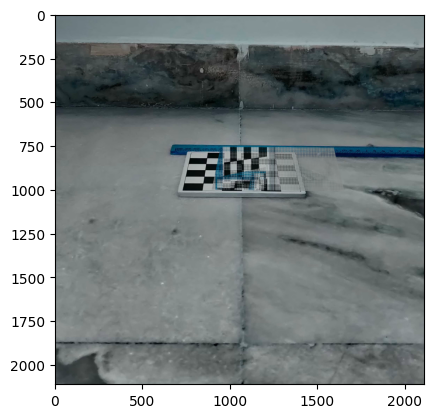

In [376]:
new_img
cv2.imwrite('shifted_image.jpg', new_img)
plt.imshow(new_img)

CHANGE IN WIREFRAME SHAPE

In [ ]:
get_image_coordinateds(np.array([[0, 0, 0], [12, 0, 0], [12, 12, 0], [0, 12, 0]], dtype=np.float32), projection_matrix)


array([[ 775.68211018,  793.55312701],
       [1345.87397667,  797.54515469],
       [1398.2195415 , 1015.95405396],
       [ 730.06688969, 1007.74032772]])

In [ ]:
get_image_coordinateds(np.array([[12, 0, 0], [24, 0, 0], [24, 12, 0], [12, 12, 0]], dtype=np.float32), projection_matrix)

array([[1345.87397667,  797.54515469],
       [1932.31786494,  801.65096604],
       [2088.76858408, 1024.44310325],
       [1398.2195415 , 1015.95405396]])

In [ ]:
def area_of_quadrilateral(vertices):
    # Ensure that vertices are provided in a specific order (clockwise or counterclockwise)
    # Assuming vertices are provided in clockwise order
    
    # Extract coordinates of vertices
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]
    x4, y4 = vertices[3]

    # Calculate the area of the quadrilateral by summing the areas of two triangles
    area_triangle1 = abs((x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2)
    area_triangle2 = abs((x1*(y3-y4) + x3*(y4-y1) + x4*(y1-y3)) / 2)

    # Total area of the quadrilateral
    total_area = area_triangle1 + area_triangle2

    return total_area

#innitial woreframe shape
vertices = [[ 775.68211018,  793.55312701],
       [1345.87397667,  797.54515469],
       [1398.2195415 , 1015.95405396],
       [ 730.06688969, 1007.74032772]] 
quadrilateral_area = area_of_quadrilateral(vertices)
print("Area of quadrilateral:", quadrilateral_area)

# shifted wireframe shape
vertices = np.array([[1345.87397667,  797.54515469],
       [1932.31786494,  801.65096604],
       [2088.76858408, 1024.44310325],
       [1398.2195415 , 1015.95405396]] , dtype=np.float32)
quadrilateral_area = area_of_quadrilateral(vertices)
print("Area of quadrilateral:", quadrilateral_area)


Area of quadrilateral: 133905.21503034522
Area of quadrilateral: 140195.2265625


WAY 2

In [313]:
world_coors.shape, new_world_coors.shape

((14400, 3), (14400, 3))

In [314]:
image_coors

array([[ 775.68211018,  793.55312701],
       [ 775.35690836,  795.08011879],
       [ 775.03091586,  796.61082325],
       ...,
       [1391.05661489, 1009.50775684],
       [1391.5565011 , 1011.62721916],
       [1392.0578274 , 1013.75278724]])

In [ ]:
world_coors = []
colors = []
for i in np.arange(0, 12, 0.1):
    for j in np.arange(0, 12, 0.1):
        world_coors.append([i, j, 0])
        # colors.append(img[x][y])



world_coors = np.array(world_coors)
image_coors = get_image_coordinateds(world_coors, projection_matrix)

img = cv2.imread("assign1.jpg")
for val in image_coords:
    colors.append(img[val[0]][val[1]])

colors = np.array(colors)


In [372]:
world_coors = []
colors = []
img = cv2.imread("assign1.jpg")
shift = 10

for i in np.arange(12, 0, -0.02):
    for j in np.arange(12, 0, -0.02):
        x, y = get_image_coordinateds(np.array([[i, j, 0]]), projection_matrix)[0]
        # print(x, y)
        x, y = int(x), int(y)
        color = img[y][x]

        x1, y1 = get_image_coordinateds(np.array([[i+shift, j, 0]]), projection_matrix)[0]
        # print(x, y)

        x1, y1 = int(x1), int(y1)
        try:
            img[y1][x1] = color
        except:
            pass
        




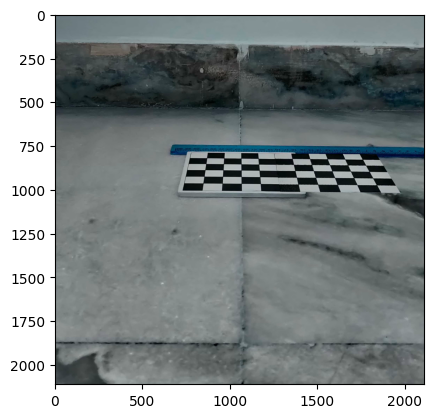

In [373]:
cv2.imwrite('shifted_image_final_10.jpg', img)
plt.imshow(img)

In [370]:
world_coors = []
colors = []
img = cv2.imread("assign1.jpg")
shift = 14

for i in np.arange(0, 12, 0.02):
    for j in np.arange(0, 12, 0.02):
        x, y = get_image_coordinateds(np.array([[i, j, 0]]), projection_matrix)[0]
        # print(x, y)
        x, y = int(x), int(y)
        color = img[y][x]

        x1, y1 = get_image_coordinateds(np.array([[i+shift, j, 0]]), projection_matrix)[0]
        # print(x, y)

        x1, y1 = int(x1), int(y1)
        try:
            img[y1][x1] = color
        except:
            pass
        




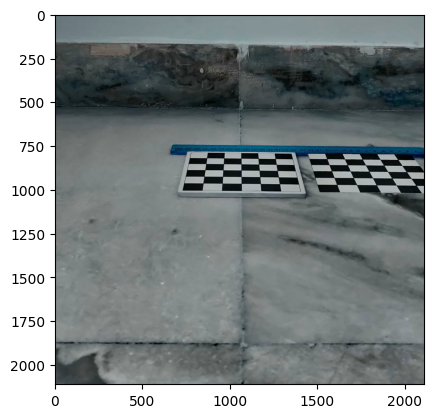

In [371]:
cv2.imwrite('shifted_image_final.jpg', img)
plt.imshow(img)

In [317]:
new_world_coors = []
for i in np.arange(0, 12, 0.1):
    for j in np.arange(12, 24, 0.1):
        new_world_coors.append([j, i, 0])

new_world_coors = np.array(new_world_coors)

new_image_coors = get_image_coordinateds(new_world_coors, projection_matrix)

In [318]:
print(image_coors)


[[ 775.68211018  793.55312701]
 [ 775.35690836  795.08011879]
 [ 775.03091586  796.61082325]
 ...
 [1391.05661489 1009.50775684]
 [1391.5565011  1011.62721916]
 [1392.0578274  1013.75278724]]


In [319]:
print(new_image_coors)

[[1345.87397667  797.54515469]
 [1350.69290508  797.57889298]
 [1355.51296228  797.61263916]
 ...
 [2069.71819789 1022.04842975]
 [2075.55636429 1022.11989821]
 [2081.39615886 1022.1913866 ]]


CHECk

In [320]:
get_image_coordinateds(np.array([[0, 0, 0], [12, 0, 0], [12, 12, 0], [0, 12, 0]], dtype=np.float32), projection_matrix)


array([[ 775.68211018,  793.55312701],
       [1345.87397667,  797.54515469],
       [1398.2195415 , 1015.95405396],
       [ 730.06688969, 1007.74032772]])

In [321]:
get_image_coordinateds(np.array([[12, 0, 0], [24, 0, 0], [24, 12, 0], [12, 12, 0]], dtype=np.float32), projection_matrix)



# new_mat : [[ 775  793]
#  [1345  797]
#  [1398 1015]
#  [ 730 1007]]

array([[1345.87397667,  797.54515469],
       [1932.31786494,  801.65096604],
       [2088.76858408, 1024.44310325],
       [1398.2195415 , 1015.95405396]])

In [322]:
def area_of_quadrilateral(vertices):
    # Ensure that vertices are provided in a specific order (clockwise or counterclockwise)
    # Assuming vertices are provided in clockwise order
    
    # Extract coordinates of vertices
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]
    x4, y4 = vertices[3]

    # Calculate the area of the quadrilateral by summing the areas of two triangles
    area_triangle1 = abs((x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2)
    area_triangle2 = abs((x1*(y3-y4) + x3*(y4-y1) + x4*(y1-y3)) / 2)

    # Total area of the quadrilateral
    total_area = area_triangle1 + area_triangle2

    return total_area

# Example usage:
vertices = [[ 775.68211018,  793.55312701],
       [1345.87397667,  797.54515469],
       [1398.2195415 , 1015.95405396],
       [ 730.06688969, 1007.74032772]] 
quadrilateral_area = area_of_quadrilateral(vertices)
print("Area of quadrilateral:", quadrilateral_area)


# Example usage:
vertices = np.array([[1345.87397667,  797.54515469],
       [1932.31786494,  801.65096604],
       [2088.76858408, 1024.44310325],
       [1398.2195415 , 1015.95405396]] , dtype=np.float32)
quadrilateral_area = area_of_quadrilateral(vertices)
print("Area of quadrilateral:", quadrilateral_area)


Area of quadrilateral: 133905.21503034522
Area of quadrilateral: 140195.2265625


In [323]:
new_image_coors[0], new_world_coors[0]

(array([1345.87397667,  797.54515469]), array([12.,  0.,  0.]))

In [324]:
np.array(new_image_coors).shape, new_world_coors.shape

((14400, 2), (14400, 3))

In [325]:
image_coors

array([[ 775.68211018,  793.55312701],
       [ 775.35690836,  795.08011879],
       [ 775.03091586,  796.61082325],
       ...,
       [1391.05661489, 1009.50775684],
       [1391.5565011 , 1011.62721916],
       [1392.0578274 , 1013.75278724]])

In [326]:
new_image_coors


array([[1345.87397667,  797.54515469],
       [1350.69290508,  797.57889298],
       [1355.51296228,  797.61263916],
       ...,
       [2069.71819789, 1022.04842975],
       [2075.55636429, 1022.11989821],
       [2081.39615886, 1022.1913866 ]])

In [334]:
colors

array([[135, 144, 147],
       [ 63,  70,  73],
       [ 43,  50,  53],
       ...,
       [116, 123, 126],
       [115, 122, 125],
       [116, 123, 126]], dtype=uint8)

In [349]:
new_img_ = cv2.imread("assign1.jpg")
for i, val in enumerate(new_image_coors):
    x, y = int(val[1]), int(val[0])
    print(x, y)
    new_img_[x][y] = colors[i]

# for i, val in enumerate(image_coors):
#     x, y = int(val[1]), int(val[0])
#     print(x, y)
#     new_img_[x][y] = colors[i]

797 1345
797 1350
797 1355
797 1360
797 1365
797 1369
797 1374
797 1379
797 1384
797 1389
797 1394
797 1398
797 1403
797 1408
798 1413
798 1418
798 1423
798 1427
798 1432
798 1437
798 1442
798 1447
798 1452
798 1456
798 1461
798 1466
798 1471
798 1476
798 1481
798 1486
798 1490
798 1495
798 1500
798 1505
798 1510
798 1515
798 1520
798 1524
798 1529
798 1534
798 1539
798 1544
798 1549
799 1554
799 1558
799 1563
799 1568
799 1573
799 1578
799 1583
799 1588
799 1593
799 1597
799 1602
799 1607
799 1612
799 1617
799 1622
799 1627
799 1632
799 1637
799 1641
799 1646
799 1651
799 1656
799 1661
799 1666
799 1671
799 1676
799 1681
799 1685
799 1690
799 1695
800 1700
800 1705
800 1710
800 1715
800 1720
800 1725
800 1730
800 1734
800 1739
800 1744
800 1749
800 1754
800 1759
800 1764
800 1769
800 1774
800 1779
800 1784
800 1789
800 1793
800 1798
800 1803
800 1808
800 1813
800 1818
800 1823
800 1828
800 1833
800 1838
801 1843
801 1848
801 1853
801 1858
801 1863
801 1867
801 1872
801 1877
801 1882
8

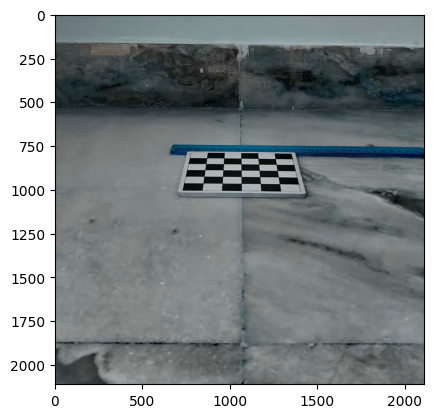

In [350]:
cv2.imwrite('shifted_image_final.jpg', new_img_)
plt.imshow(new_img_)